
<h1 align="center">Matplotlib Tasks</h1>
<h1 align="center">Artur Avagyan</h1>
<h1 align="center">Homework 3 (Matplotlib)</h1>

### Import all the packeges we need for our work

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Read csv file

In [47]:
df_w=pd.read_csv("weather-check.csv")

## Assignment 1

### Create table (dataframe) with this 2 colums
   <ul>
    <li>If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?</li>
    <li>Age</li>
   </ul>

In [48]:
df_w=df_w.replace('-', np.nan)
df_w=df_w.dropna()
df_new=pd.DataFrame(pd.crosstab(df_w["Age"],df_w["If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?"]))

In [49]:
df_new

"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
Age,,,,
18 - 29,11,0,14,3
30 - 44,18,1,16,9
45 - 59,12,3,30,11
60+,10,4,21,10


### Create matplotlib plot Chart 1( each row sums up to 100%)

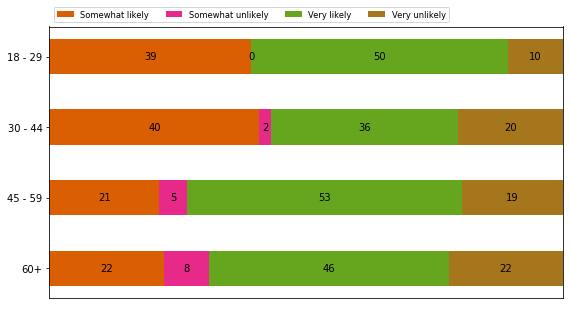

In [50]:
result_dic_100={}
for i in range(len(df_new.index)):
    result_dic_100[df_new.index[i]]=[]
    for j in range(len(df_new.columns)):
        result_dic_100[df_new.index[i]].append(np.round(df_new.iloc[i,j]/np.sum(df_new, axis=1)[i]*100,2))
category_names=df_new.columns


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('Dark2')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(result_dic_100, category_names)
plt.show()

### Create matplotlib plot Chart 2 (absolute values, that do not sum up to 100% (for example, 187,315, etc.))

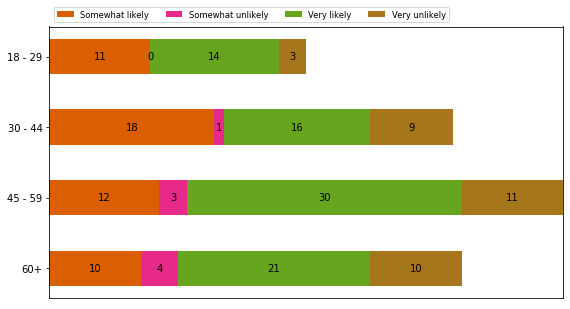

In [51]:
result_dic={}
for i in range(len(df_new.index)):
    result_dic[df_new.index[i]]=[]
    for j in range(len(df_new.columns)):
        result_dic[df_new.index[i]].append(df_new.iloc[i,j])

category_names=df_new.columns

survey(result_dic, category_names)
plt.show()


## Assignment 2

In [52]:
import matplotlib.gridspec as gridspec

### Create function, that plot in each axis

In [53]:
def survey_sub(results, category_names,ax):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('Dark2')(
        np.linspace(0.15, 0.85, data.shape[1]))

    #fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return ax

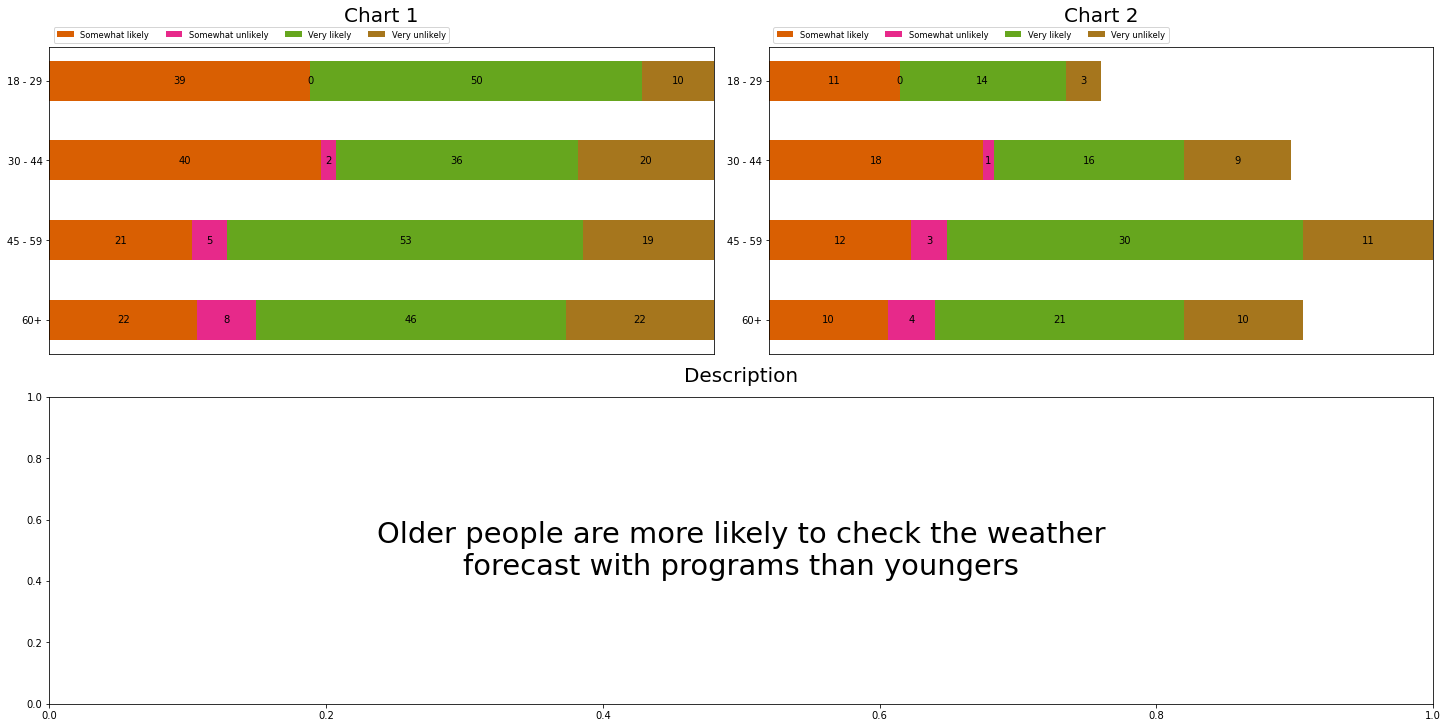

In [54]:
fig = plt.figure(constrained_layout=True,figsize=(20,10))
gs = fig.add_gridspec(4, 4)
fg_ax1 = fig.add_subplot(gs[0:2, 0:2])
survey_sub(result_dic_100, category_names,fg_ax1)
#fg_ax1.plot(x,y)
fg_ax1.set_title('Chart 1',size=20,pad=25)

fg_ax2 = fig.add_subplot(gs[0:2, 2:])
survey_sub(result_dic, category_names,fg_ax2)
fg_ax2.set_title('Chart 2',size=20,pad=25)

fg_ax3 = fig.add_subplot(gs[-2:, :])
anno_opts = dict(xy=(0.5, 0.5), xycoords='axes fraction',
                 va='center', ha='center',size=29)
fg_ax3.annotate('Older people are more likely to check the weather\nforecast with programs than youngers', **anno_opts)
fg_ax3.set_title('Description',size=20,pad=15)
plt.show()